In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load the Qwen3-30B-A3B model from the specified cache directory
model_name = "Qwen/Qwen3-30B-A3B"
cache_dir = "/fsx-project/rishabhtiwari/hf_cache"

print(f"Loading model: {model_name}")
print(f"Cache directory: {cache_dir}")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    cache_dir=cache_dir,
    trust_remote_code=True
)

# Load model
from transformers import AutoConfig

# Load config first
config = AutoConfig.from_pretrained(
    model_name,
    cache_dir=cache_dir,
    trust_remote_code=True
)

# Initialize model from config without pretrained weights
model = AutoModelForCausalLM.from_config(
    config,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
)

# Move to device
# model = model.to("cuda" if torch.cuda.is_available() else "cpu")

print("Model loaded successfully!")
print(f"Model type: {type(model)}")
print(f"Model device: {next(model.parameters()).device}")


In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
cache_dir = "/fsx-project/rishabhtiwari/hf_cache"

tokenizer = AutoTokenizer.from_pretrained(
    "/home/rishabhtiwari/hf_cache/Qwen--Qwen3-30B-A3B-Base/",
    cache_dir=cache_dir,
    trust_remote_code=True
)

/home/rishabhtiwari/.conda/envs/01_training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from llamafactory.data.template import parse_template

In [8]:
template = parse_template(tokenizer)

True

In [4]:
tokenizer.chat_template

'{%- if tools %}\n    {{- \'<|im_start|>system\\n\' }}\n    {%- if messages[0].role == \'system\' %}\n        {{- messages[0].content + \'\\n\\n\' }}\n    {%- endif %}\n    {{- "# Tools\\n\\nYou may call one or more functions to assist with the user query.\\n\\nYou are provided with function signatures within <tools></tools> XML tags:\\n<tools>" }}\n    {%- for tool in tools %}\n        {{- "\\n" }}\n        {{- tool | tojson }}\n    {%- endfor %}\n    {{- "\\n</tools>\\n\\nFor each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:\\n<tool_call>\\n{\\"name\\": <function-name>, \\"arguments\\": <args-json-object>}\\n</tool_call><|im_end|>\\n" }}\n{%- else %}\n    {%- if messages[0].role == \'system\' %}\n        {{- \'<|im_start|>system\\n\' + messages[0].content + \'<|im_end|>\\n\' }}\n    {%- endif %}\n{%- endif %}\n{%- set ns = namespace(multi_step_tool=true, last_query_index=messages|length - 1) %}\n{%- for message in messa

In [2]:
from huggingface_hub import hf_hub_download
import json
config_path = hf_hub_download(repo_id="open-thoughts/OpenThoughts3-1.2M", filename="data", repo_type="dataset", cache_dir="/home/rishabhtiwari/hf_cache/datasets")

with open(config_path, 'r') as f:
    config = json.load(f)

print(config)

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-68c21b8f-1e0483d220fe8cb049276bc4;f4cce2bd-c97f-4ffd-b779-67daca1b56a9)

Entry Not Found for url: https://huggingface.co/datasets/open-thoughts/OpenThoughts3-1.2M/resolve/main/data.

In [1]:
from datasets import load_dataset
dataset = load_dataset("open-thoughts/OpenThoughts3-1.2M", cache_dir="/home/rishabhtiwari/hf_cache")

/home/rishabhtiwari/.conda/envs/reasoning-training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

  2025-09-11T00:39:43.779329Z  WARN  Status Code: 504. Retrying..., request_id: ""
    at /home/runner/work/xet-core/xet-core/cas_client/src/http_client.rs:220

  2025-09-11T00:39:43.779376Z  WARN  Retry attempt #0. Sleeping 323.214594ms before the next attempt
    at /root/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/reqwest-retry-0.7.0/src/middleware.rs:171



Generating train split: 100%|██████████| 1200000/1200000 [02:03<00:00, 9753.76 examples/s] 


In [3]:
import datasets
dataset = datasets.load_dataset("open-thoughts/OpenThoughts3-1.2M", cache_dir="/home/rishabhtiwari/hf_cache")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['difficulty', 'source', 'domain', 'conversations'],
        num_rows: 1200000
    })
})


In [6]:
dataset['train']

Dataset({
    features: ['difficulty', 'source', 'domain', 'conversations'],
    num_rows: 1200000
})

In [ ]:
# Filter dataset based on source
# First, let's see what sources are available
domains = set(dataset['train']['domain'])
print("Available domains:")
for domain in sorted(domains):
    print(f"  - {domain}")

print(f"\nTotal number of domains: {len(domains)}")

# Example: Filter by a specific source (replace 'your_source' with actual source name)
# filtered_dataset = dataset['train'].filter(lambda x: x['source'] == 'your_source')

# Example: Filter by multiple sources
# domains_to_keep = ['math', 'code', 'science']
# filtered_dataset = dataset['train'].filter(lambda x: x['domain'] in domains_to_keep)

# Example: Filter out specific sources
# sources_to_exclude = ['source_to_exclude']
# filtered_dataset = dataset['train'].filter(lambda x: x['source'] not in sources_to_exclude)


Available domains:
  - code
  - math
  - science

Total number of domains: 3


In [12]:
dataset['train'] = filtered_dataset

In [ ]:
dataset

In [7]:
# Save the filtered dataset
dataset.save_to_disk("/home/rishabhtiwari/hf_cache/openthoughts3")
print("Dataset saved successfully!")


Saving the dataset (120/120 shards): 100%|██████████| 1200000/1200000 [01:11<00:00, 16692.67 examples/s]

Dataset saved successfully!


In [ ]:
# Print a few datapoints from the dataset
for i in range(3):
    print(f"=== Datapoint {i+1} ===")
    example = filtered_dataset[i]
    print(f"Difficulty: {example['difficulty']}")
    print(f"Source: {example['source']}")
    print(f"Domain: {example['domain']}")
    print("Conversations:")
    for j, conv in enumerate(example['conversations']):
        print(f"  {j+1}. From: {conv['from']}")
        print(f"     Value: {conv['value'][:200]}{'...' if len(conv['value']) > 200 else ''}")
    print()



In [ ]:
model_name = "/home/rishabhtiwari/hf_cache/Qwen--Qwen3-30B-A3B-Instruct-2507/"  # Replace with your MoE model
model = AutoModelForCausalLM.from_pretrained(
        model_name, 
        torch_dtype=torch.float16,
        device_map="auto",
        output_router_logits=True  # Enable router logits output
    )

Loading checkpoint shards: 100%|██████████| 16/16 [00:34<00:00,  2.16s/it]


In [19]:
question = "What is the derivative of x^2 + 3x + 1?"


Question: What is the derivative of x^2 + 3x + 1?
Formatted input: <|im_start|>user
What is the derivative of x^2 + 3x + 1?<|im_end|>
<|im_start|>assistant


Generating model response with router probability tracking...
48 torch.Size([24, 128])
48 torch.Size([25, 128])
48 torch.Size([26, 128])
48 torch.Size([27, 128])
48 torch.Size([28, 128])
48 torch.Size([29, 128])
48 torch.Size([30, 128])
48 torch.Size([31, 128])
48 torch.Size([32, 128])
48 torch.Size([33, 128])
48 torch.Size([34, 128])
48 torch.Size([35, 128])
48 torch.Size([36, 128])
48 torch.Size([37, 128])
48 torch.Size([38, 128])
48 torch.Size([39, 128])
48 torch.Size([40, 128])
48 torch.Size([41, 128])
48 torch.Size([42, 128])
48 torch.Size([43, 128])
48 torch.Size([44, 128])
48 torch.Size([45, 128])
48 torch.Size([46, 128])
48 torch.Size([47, 128])
48 torch.Size([48, 128])
48 torch.Size([49, 128])
48 torch.Size([50, 128])
48 torch.Size([51, 128])
48 torch.Size([52, 128])
48 torch.Size([53, 128])
48 torch.Size([54, 128])
48 to

/tmp/ipykernel_171481/1018991915.py:130: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(probs * np.log(probs + 1e-10))
/tmp/ipykernel_171481/1018991915.py:130: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(probs * np.log(probs + 1e-10))


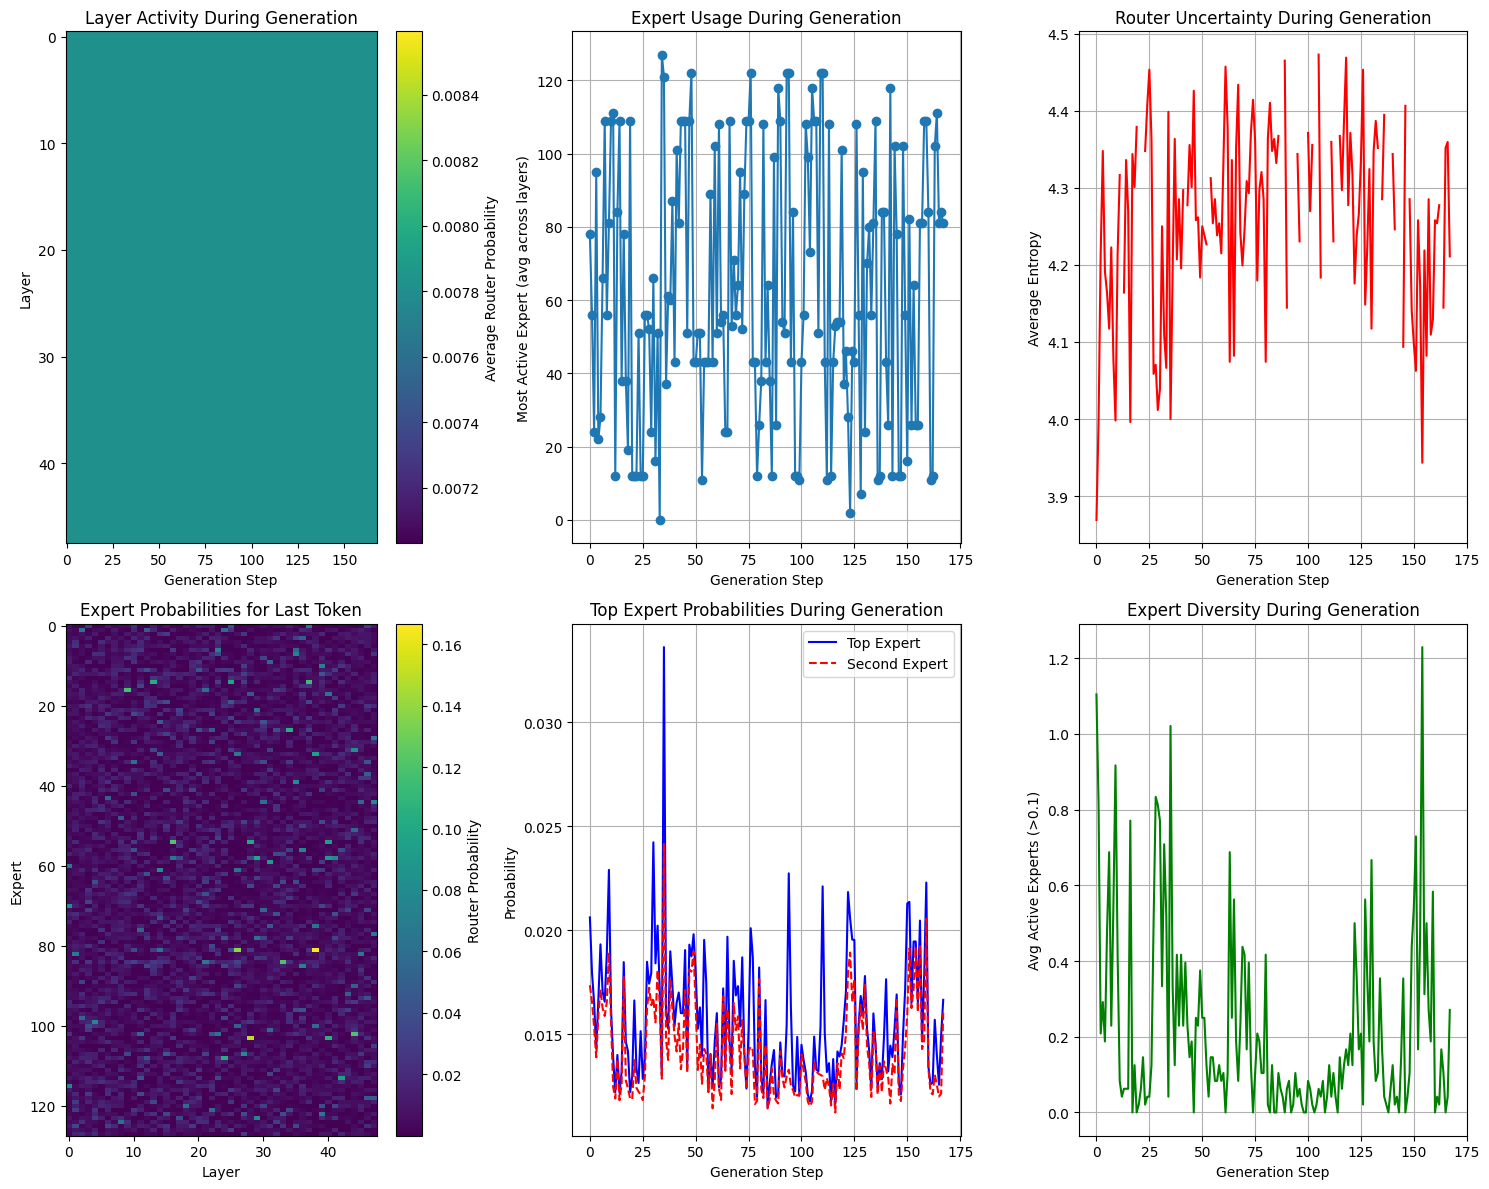


Generation Analysis:
Number of generated tokens: 168
Number of layers: 48
Number of experts: 128

Generated tokens with their router probabilities:
Step  0: Token 'To' (ID: 1249)
  Layer  0: Expert 84(0.128), Expert 16(0.109), Expert 1(0.062), Expert 98(0.049), Expert 114(0.044), entropy=3.994
  Layer  1: Expert 119(0.164), Expert 127(0.132), Expert 121(0.128), Expert 82(0.041), Expert 15(0.030), entropy=3.617
  Layer  2: Expert 95(0.080), Expert 82(0.068), Expert 80(0.064), Expert 47(0.052), Expert 38(0.036), entropy=4.152
  Layer  3: Expert 120(0.122), Expert 115(0.074), Expert 16(0.053), Expert 82(0.042), Expert 124(0.041), entropy=4.191
  Layer  4: Expert 52(0.073), Expert 81(0.072), Expert 115(0.044), Expert 73(0.036), Expert 109(0.036), entropy=4.266
  ... and 43 more layers

Step  1: Token ' find' (ID: 1477)
  Layer  0: Expert 50(0.134), Expert 21(0.063), Expert 93(0.061), Expert 11(0.050), Expert 60(0.044), entropy=4.090
  Layer  1: Expert 119(0.082), Expert 6(0.063), Expert 1

In [21]:
# Analyze layerwise router probabilities for a given question
import torch
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
outputs = None

def analyze_router_probabilities(model, question, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Analyze router probabilities across layers for a given question.
    This function assumes the model has mixture of experts (MoE) architecture.
    """
    
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    
    # Format the question using the chat template
    messages = [
        {"role": "user", "content": question}
    ]
    formatted_text = tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )
    
    # Tokenize the formatted question
    inputs = tokenizer(formatted_text, return_tensors="pt").to(device)
    
    # Generate response while collecting router probabilities for each token
    print(f"Question: {question}")
    print(f"Formatted input: {formatted_text}")
    print("\nGenerating model response with router probability tracking...")
    
    all_router_probs = []
    generated_tokens = []
    
    with torch.no_grad():
        # Start with the input tokens
        input_ids = inputs['input_ids']
        attention_mask = inputs.get('attention_mask', None)
        
        for step in range(256):  # max_new_tokens
            # Forward pass with router logits
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_router_logits=True,
                use_cache=True
            )
            print(len(outputs.router_logits), outputs.router_logits[0].shape)            
            # Get router logits for this generation step
            router_logits = outputs.router_logits
            
            # Convert logits to probabilities for each layer
            step_router_probs = []
            for layer_logits in router_logits:
                # Apply softmax to get probabilities
                probs = torch.softmax(layer_logits, dim=-1)
                # Take the probabilities for the last token (the one being generated)
                last_token_probs = probs[-1, :].cpu().numpy()
                step_router_probs.append(last_token_probs)
            
            all_router_probs.append(step_router_probs)
            
            # Get next token
            logits = outputs.logits
            next_token_logits = logits[:, -1, :]
            next_token_id = torch.argmax(next_token_logits, dim=-1, keepdim=True)
            
            # Store the generated token
            generated_tokens.append(next_token_id.item())
            
            # Check for EOS token
            if next_token_id.item() == tokenizer.eos_token_id:
                break
                
            # Update input_ids for next iteration
            input_ids = torch.cat([input_ids, next_token_id], dim=-1)
            if attention_mask is not None:
                attention_mask = torch.cat([attention_mask, torch.ones_like(next_token_id)], dim=-1)
    
    # Decode and print the response
    generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
    print(f"\nModel Response: {generated_text}")
    print("="*80)
    
    # Convert to numpy arrays for analysis
    # all_router_probs is [num_generated_tokens, num_layers, batch_size, num_experts]
    num_generated_tokens = len(all_router_probs)
    num_layers = len(all_router_probs[0])
    num_experts = all_router_probs[0][0].shape[-1]
    
    # Reshape for easier analysis: [num_layers, num_generated_tokens, num_experts]
    router_probs_array = np.array([[all_router_probs[token][layer].squeeze() 
                                   for token in range(num_generated_tokens)] 
                                  for layer in range(num_layers)])
    
    # Visualize router probabilities during generation
    plt.figure(figsize=(15, 12))
    
    # Plot heatmap of router probabilities across layers and generation steps
    plt.subplot(2, 3, 1)
    # Average across experts to show layer activity over time
    layer_activity = np.mean(router_probs_array, axis=2)
    plt.imshow(layer_activity, aspect='auto', cmap='viridis')
    plt.colorbar(label='Average Router Probability')
    plt.xlabel('Generation Step')
    plt.ylabel('Layer')
    plt.title('Layer Activity During Generation')
    
    # Plot expert utilization across generation steps
    plt.subplot(2, 3, 2)
    # For each generation step, find the most active expert across all layers
    most_active_experts = np.argmax(np.mean(router_probs_array, axis=0), axis=1)
    plt.plot(range(num_generated_tokens), most_active_experts, 'o-')
    plt.xlabel('Generation Step')
    plt.ylabel('Most Active Expert (avg across layers)')
    plt.title('Expert Usage During Generation')
    plt.grid(True)
    
    # Plot router entropy during generation (averaged across layers)
    plt.subplot(2, 3, 3)
    entropy_over_time = []
    for token_step in range(num_generated_tokens):
        token_entropy = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            entropy = -np.sum(probs * np.log(probs + 1e-10))
            token_entropy.append(entropy)
        entropy_over_time.append(np.mean(token_entropy))
    
    plt.plot(range(num_generated_tokens), entropy_over_time, 'r-')
    plt.xlabel('Generation Step')
    plt.ylabel('Average Entropy')
    plt.title('Router Uncertainty During Generation')
    plt.grid(True)
    
    # Plot layer-wise expert distribution for the last generated token
    plt.subplot(2, 3, 4)
    if num_generated_tokens > 0:
        last_token_probs = router_probs_array[:, -1, :]  # [num_layers, num_experts]
        plt.imshow(last_token_probs.T, aspect='auto', cmap='viridis')
        plt.colorbar(label='Router Probability')
        plt.xlabel('Layer')
        plt.ylabel('Expert')
        plt.title('Expert Probabilities for Last Token')
    
    # Plot top expert probability trends
    plt.subplot(2, 3, 5)
    top_expert_probs = []
    second_expert_probs = []
    for token_step in range(num_generated_tokens):
        # Average across layers for this token
        avg_probs = np.mean(router_probs_array[:, token_step, :], axis=0)
        sorted_probs = np.sort(avg_probs)
        top_expert_probs.append(sorted_probs[-1])
        second_expert_probs.append(sorted_probs[-2])
    
    plt.plot(range(num_generated_tokens), top_expert_probs, 'b-', label='Top Expert')
    plt.plot(range(num_generated_tokens), second_expert_probs, 'r--', label='Second Expert')
    plt.xlabel('Generation Step')
    plt.ylabel('Probability')
    plt.title('Top Expert Probabilities During Generation')
    plt.legend()
    plt.grid(True)
    
    # Plot expert diversity (number of experts with >threshold probability)
    plt.subplot(2, 3, 6)
    expert_diversity = []
    threshold = 0.1
    for token_step in range(num_generated_tokens):
        # Count experts with probability > threshold across all layers
        active_experts = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            active_count = np.sum(probs > threshold)
            active_experts.append(active_count)
        expert_diversity.append(np.mean(active_experts))
    
    plt.plot(range(num_generated_tokens), expert_diversity, 'g-')
    plt.xlabel('Generation Step')
    plt.ylabel(f'Avg Active Experts (>{threshold})')
    plt.title('Expert Diversity During Generation')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nGeneration Analysis:")
    print(f"Number of generated tokens: {num_generated_tokens}")
    print(f"Number of layers: {num_layers}")
    print(f"Number of experts: {num_experts}")
    
    print(f"\nGenerated tokens with their router probabilities:")
    for i, token_id in enumerate(generated_tokens):
        token_text = tokenizer.decode([token_id])
        print(f"Step {i:2d}: Token '{token_text}' (ID: {token_id})")
        
        # Show most active experts per layer for this token
        for layer in range(min(5, num_layers)):  # Show first 5 layers
            probs = router_probs_array[layer, i, :]
            # Get top 5 experts
            top_5_indices = np.argsort(probs)[-5:][::-1]  # Sort and get top 5, reverse for descending order
            top_5_probs = probs[top_5_indices]
            entropy_val = -np.sum(probs * np.log(probs + 1e-10))
            
            expert_str = ", ".join([f"Expert {idx}({prob:.3f})" for idx, prob in zip(top_5_indices, top_5_probs)])
            print(f"  Layer {layer:2d}: {expert_str}, entropy={entropy_val:.3f}")
        
        if num_layers > 5:
            print(f"  ... and {num_layers - 5} more layers")
        print()
    
    return all_router_probs, router_probs_array, generated_text

# Example usage with a mathematical question

# try:
router_probs, router_array, model_output = analyze_router_probabilities(model, question)
print(f"\nRouter probabilities shape: {router_array.shape}")
print("Format: [num_layers, num_generated_tokens, num_experts]")
# except Exception as e:
#     print(f"Error analyzing router probabilities: {e}")
#     print("Note: This analysis requires a model with Mixture of Experts (MoE) architecture.")
#     print("Make sure to use a model that outputs router logits.")


Question: Who is the president of the United States?
Formatted input: <|im_start|>user
Who is the president of the United States?<|im_end|>
<|im_start|>assistant


Generating model response with router probability tracking...
48 torch.Size([17, 128])
48 torch.Size([18, 128])
48 torch.Size([19, 128])
48 torch.Size([20, 128])
48 torch.Size([21, 128])
48 torch.Size([22, 128])
48 torch.Size([23, 128])
48 torch.Size([24, 128])
48 torch.Size([25, 128])
48 torch.Size([26, 128])
48 torch.Size([27, 128])
48 torch.Size([28, 128])
48 torch.Size([29, 128])
48 torch.Size([30, 128])
48 torch.Size([31, 128])
48 torch.Size([32, 128])
48 torch.Size([33, 128])
48 torch.Size([34, 128])
48 torch.Size([35, 128])
48 torch.Size([36, 128])
48 torch.Size([37, 128])
48 torch.Size([38, 128])
48 torch.Size([39, 128])
48 torch.Size([40, 128])
48 torch.Size([41, 128])
48 torch.Size([42, 128])
48 torch.Size([43, 128])
48 torch.Size([44, 128])
48 torch.Size([45, 128])
48 torch.Size([46, 128])
48 torch.Size([47, 128])

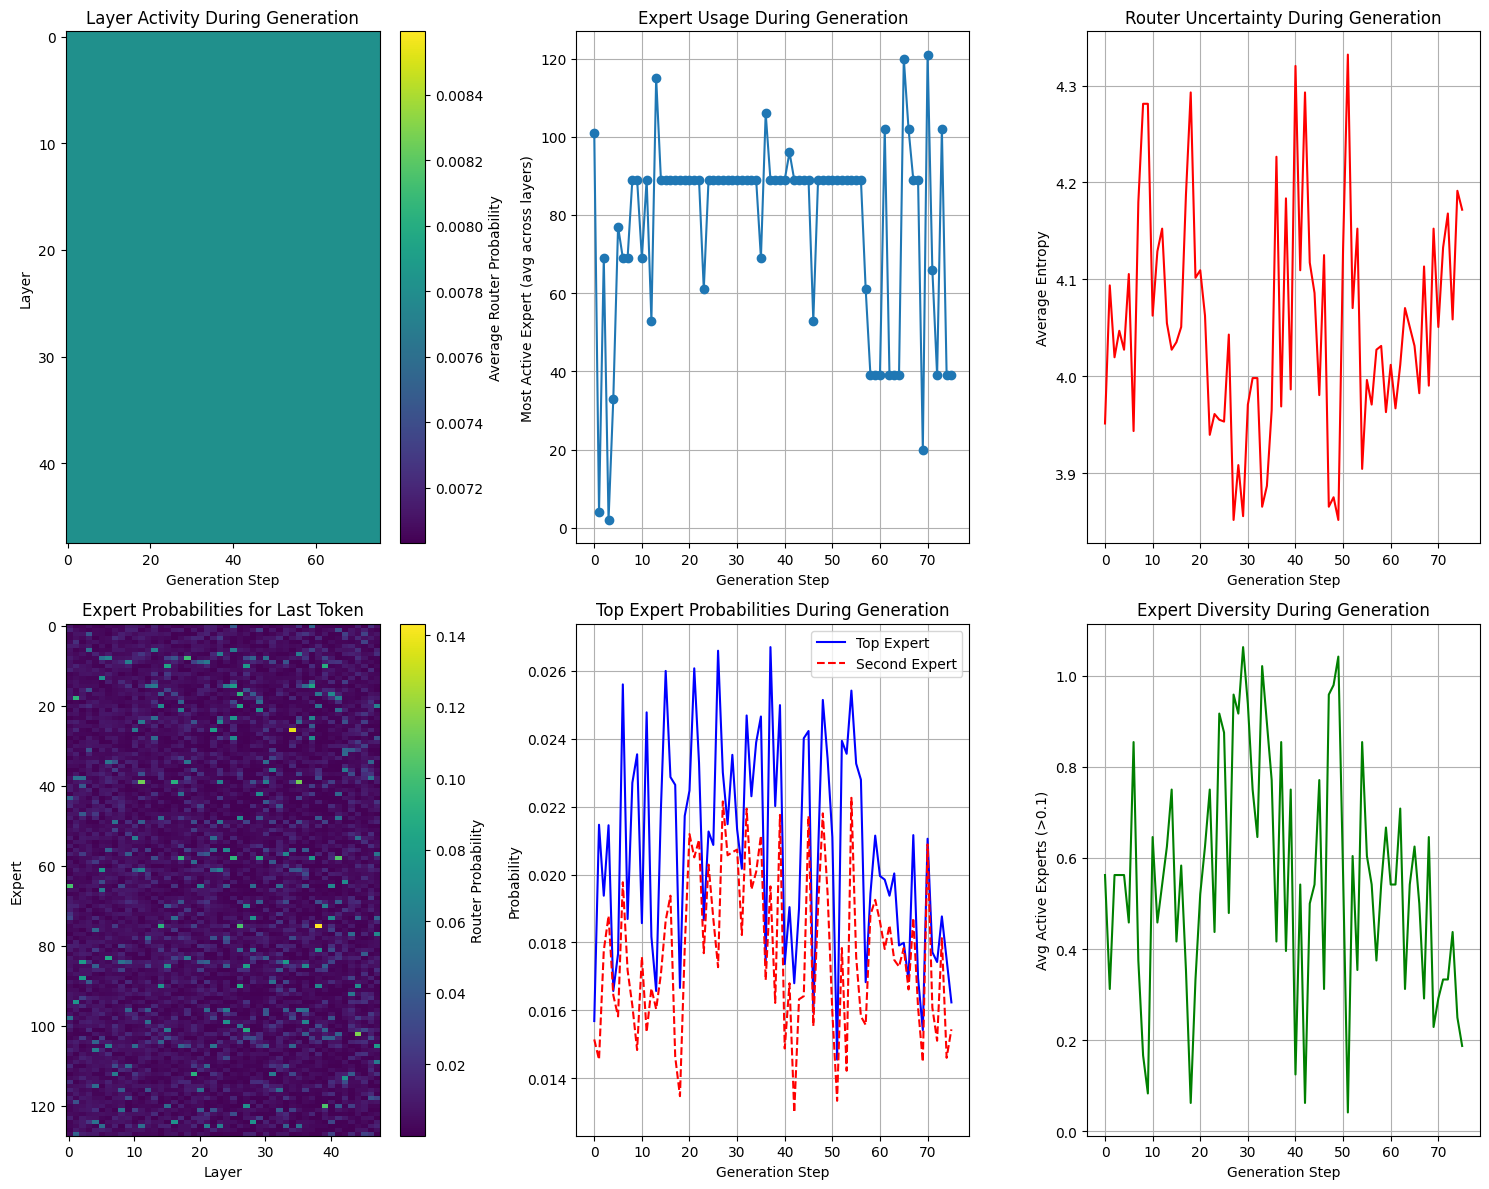


Generation Analysis:
Number of generated tokens: 76
Number of layers: 48
Number of experts: 128

Generated tokens with their router probabilities:
Step  0: Token 'As' (ID: 2121)
  Layer  0: Expert 84(0.137), Expert 16(0.097), Expert 1(0.055), Expert 98(0.050), Expert 114(0.049), entropy=4.008
  Layer  1: Expert 127(0.196), Expert 119(0.136), Expert 121(0.093), Expert 82(0.034), Expert 70(0.032), entropy=3.631
  Layer  2: Expert 82(0.070), Expert 80(0.063), Expert 95(0.052), Expert 40(0.042), Expert 2(0.040), entropy=4.184
  Layer  3: Expert 120(0.101), Expert 124(0.087), Expert 115(0.062), Expert 16(0.052), Expert 82(0.044), entropy=4.180
  Layer  4: Expert 81(0.073), Expert 115(0.048), Expert 73(0.038), Expert 52(0.037), Expert 85(0.033), entropy=4.332
  ... and 43 more layers

Step  1: Token ' of' (ID: 315)
  Layer  0: Expert 50(0.115), Expert 63(0.075), Expert 21(0.075), Expert 75(0.052), Expert 93(0.038), entropy=4.121
  Layer  1: Expert 6(0.071), Expert 116(0.056), Expert 125(0.0

In [22]:
# Analyze layerwise router probabilities for a given question
import torch
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
outputs = None
question = "Who is the president of the United States?"

def analyze_router_probabilities(model, question, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Analyze router probabilities across layers for a given question.
    This function assumes the model has mixture of experts (MoE) architecture.
    """
    
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    
    # Format the question using the chat template
    messages = [
        {"role": "user", "content": question}
    ]
    formatted_text = tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )
    
    # Tokenize the formatted question
    inputs = tokenizer(formatted_text, return_tensors="pt").to(device)
    
    # Generate response while collecting router probabilities for each token
    print(f"Question: {question}")
    print(f"Formatted input: {formatted_text}")
    print("\nGenerating model response with router probability tracking...")
    
    all_router_probs = []
    generated_tokens = []
    
    with torch.no_grad():
        # Start with the input tokens
        input_ids = inputs['input_ids']
        attention_mask = inputs.get('attention_mask', None)
        
        for step in range(256):  # max_new_tokens
            # Forward pass with router logits
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_router_logits=True,
                use_cache=True
            )
            print(len(outputs.router_logits), outputs.router_logits[0].shape)            
            # Get router logits for this generation step
            router_logits = outputs.router_logits
            
            # Convert logits to probabilities for each layer
            step_router_probs = []
            for layer_logits in router_logits:
                # Apply softmax to get probabilities
                probs = torch.softmax(layer_logits, dim=-1)
                # Take the probabilities for the last token (the one being generated)
                last_token_probs = probs[-1, :].cpu().numpy()
                step_router_probs.append(last_token_probs)
            
            all_router_probs.append(step_router_probs)
            
            # Get next token
            logits = outputs.logits
            next_token_logits = logits[:, -1, :]
            next_token_id = torch.argmax(next_token_logits, dim=-1, keepdim=True)
            
            # Store the generated token
            generated_tokens.append(next_token_id.item())
            
            # Check for EOS token
            if next_token_id.item() == tokenizer.eos_token_id:
                break
                
            # Update input_ids for next iteration
            input_ids = torch.cat([input_ids, next_token_id], dim=-1)
            if attention_mask is not None:
                attention_mask = torch.cat([attention_mask, torch.ones_like(next_token_id)], dim=-1)
    
    # Decode and print the response
    generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
    print(f"\nModel Response: {generated_text}")
    print("="*80)
    
    # Convert to numpy arrays for analysis
    # all_router_probs is [num_generated_tokens, num_layers, batch_size, num_experts]
    num_generated_tokens = len(all_router_probs)
    num_layers = len(all_router_probs[0])
    num_experts = all_router_probs[0][0].shape[-1]
    
    # Reshape for easier analysis: [num_layers, num_generated_tokens, num_experts]
    router_probs_array = np.array([[all_router_probs[token][layer].squeeze() 
                                   for token in range(num_generated_tokens)] 
                                  for layer in range(num_layers)])
    
    # Visualize router probabilities during generation
    plt.figure(figsize=(15, 12))
    
    # Plot heatmap of router probabilities across layers and generation steps
    plt.subplot(2, 3, 1)
    # Average across experts to show layer activity over time
    layer_activity = np.mean(router_probs_array, axis=2)
    plt.imshow(layer_activity, aspect='auto', cmap='viridis')
    plt.colorbar(label='Average Router Probability')
    plt.xlabel('Generation Step')
    plt.ylabel('Layer')
    plt.title('Layer Activity During Generation')
    
    # Plot expert utilization across generation steps
    plt.subplot(2, 3, 2)
    # For each generation step, find the most active expert across all layers
    most_active_experts = np.argmax(np.mean(router_probs_array, axis=0), axis=1)
    plt.plot(range(num_generated_tokens), most_active_experts, 'o-')
    plt.xlabel('Generation Step')
    plt.ylabel('Most Active Expert (avg across layers)')
    plt.title('Expert Usage During Generation')
    plt.grid(True)
    
    # Plot router entropy during generation (averaged across layers)
    plt.subplot(2, 3, 3)
    entropy_over_time = []
    for token_step in range(num_generated_tokens):
        token_entropy = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            entropy = -np.sum(probs * np.log(probs + 1e-10))
            token_entropy.append(entropy)
        entropy_over_time.append(np.mean(token_entropy))
    
    plt.plot(range(num_generated_tokens), entropy_over_time, 'r-')
    plt.xlabel('Generation Step')
    plt.ylabel('Average Entropy')
    plt.title('Router Uncertainty During Generation')
    plt.grid(True)
    
    # Plot layer-wise expert distribution for the last generated token
    plt.subplot(2, 3, 4)
    if num_generated_tokens > 0:
        last_token_probs = router_probs_array[:, -1, :]  # [num_layers, num_experts]
        plt.imshow(last_token_probs.T, aspect='auto', cmap='viridis')
        plt.colorbar(label='Router Probability')
        plt.xlabel('Layer')
        plt.ylabel('Expert')
        plt.title('Expert Probabilities for Last Token')
    
    # Plot top expert probability trends
    plt.subplot(2, 3, 5)
    top_expert_probs = []
    second_expert_probs = []
    for token_step in range(num_generated_tokens):
        # Average across layers for this token
        avg_probs = np.mean(router_probs_array[:, token_step, :], axis=0)
        sorted_probs = np.sort(avg_probs)
        top_expert_probs.append(sorted_probs[-1])
        second_expert_probs.append(sorted_probs[-2])
    
    plt.plot(range(num_generated_tokens), top_expert_probs, 'b-', label='Top Expert')
    plt.plot(range(num_generated_tokens), second_expert_probs, 'r--', label='Second Expert')
    plt.xlabel('Generation Step')
    plt.ylabel('Probability')
    plt.title('Top Expert Probabilities During Generation')
    plt.legend()
    plt.grid(True)
    
    # Plot expert diversity (number of experts with >threshold probability)
    plt.subplot(2, 3, 6)
    expert_diversity = []
    threshold = 0.1
    for token_step in range(num_generated_tokens):
        # Count experts with probability > threshold across all layers
        active_experts = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            active_count = np.sum(probs > threshold)
            active_experts.append(active_count)
        expert_diversity.append(np.mean(active_experts))
    
    plt.plot(range(num_generated_tokens), expert_diversity, 'g-')
    plt.xlabel('Generation Step')
    plt.ylabel(f'Avg Active Experts (>{threshold})')
    plt.title('Expert Diversity During Generation')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nGeneration Analysis:")
    print(f"Number of generated tokens: {num_generated_tokens}")
    print(f"Number of layers: {num_layers}")
    print(f"Number of experts: {num_experts}")
    
    print(f"\nGenerated tokens with their router probabilities:")
    for i, token_id in enumerate(generated_tokens):
        token_text = tokenizer.decode([token_id])
        print(f"Step {i:2d}: Token '{token_text}' (ID: {token_id})")
        
        # Show most active experts per layer for this token
        for layer in range(min(5, num_layers)):  # Show first 5 layers
            probs = router_probs_array[layer, i, :]
            # Get top 5 experts
            top_5_indices = np.argsort(probs)[-5:][::-1]  # Sort and get top 5, reverse for descending order
            top_5_probs = probs[top_5_indices]
            entropy_val = -np.sum(probs * np.log(probs + 1e-10))
            
            expert_str = ", ".join([f"Expert {idx}({prob:.3f})" for idx, prob in zip(top_5_indices, top_5_probs)])
            print(f"  Layer {layer:2d}: {expert_str}, entropy={entropy_val:.3f}")
        
        if num_layers > 5:
            print(f"  ... and {num_layers - 5} more layers")
        print()
    
    return all_router_probs, router_probs_array, generated_text

# Example usage with a mathematical question

# try:
router_probs, router_array, model_output = analyze_router_probabilities(model, question)
print(f"\nRouter probabilities shape: {router_array.shape}")
print("Format: [num_layers, num_generated_tokens, num_experts]")
# except Exception as e:
#     print(f"Error analyzing router probabilities: {e}")
#     print("Note: This analysis requires a model with Mixture of Experts (MoE) architecture.")
#     print("Make sure to use a model that outputs router logits.")
